# Credit Card Fraud Detection 🕵️‍♂️💳

This project aims to detect fraudulent credit card transactions using machine learning techniques. 
We will preprocess the data, explore it, build models, and evaluate their performance.

**Goals:**
1. Preprocess the data.
2. Explore the data using visualizations.
3. Engineer features to improve model performance.
4. Build and evaluate multiple machine learning models.
5. Select the best model for fraud detection.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Data 📂

After downloading the data, we load it into pandas DataFrames for further processing.

**Data Files:**
- `fraudTrain.csv`: Training data with labels.
- `fraudTest.csv`: Test data with labels.

In [2]:
df_train = pd.read_csv(r"D:\Python\HypeIntern\archive\fraudTrain.csv")
df_test = pd.read_csv(r"D:\Python\HypeIntern\archive\fraudTest.csv")

## Preprocessing the Data 🧹

We will clean and preprocess the data to make it suitable for analysis and modeling. 
This includes handling missing values, encoding categorical variables, and scaling numerical features.

**Steps:**
1. Handle missing values.
2. Encode categorical variables.
3. Scale numerical features.

In [3]:
print(df_train.shape[0])
print(df_test.shape[0])

1296675
555719


In [4]:
df = pd.concat([df_train, df_test])
df.shape[0]

1852394

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


<Axes: xlabel='is_fraud'>

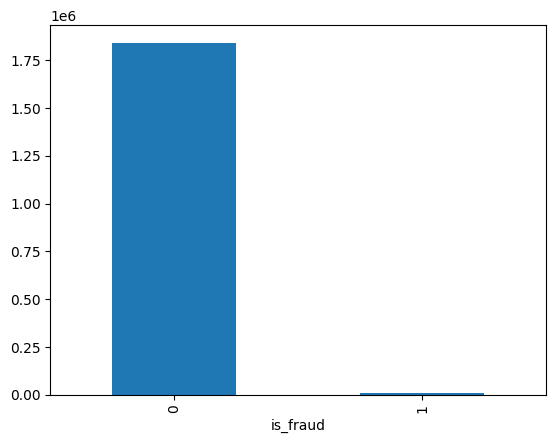

In [6]:
df.groupby("is_fraud").count()['cc_num'].plot(kind = "bar")

As we can see from the plot the number of `not_fraud` is way larger than `fraud` which will decrease the performance of the model as there will be high chance to choose not_Fraud over fraud so we will resample it

In [7]:
fraud = df[df["is_fraud"] == 1]
not_fraud =  df[df["is_fraud"] == 0]
print(fraud.shape[0])
print(not_fraud.shape[0])

9651
1842743


In [8]:
not_fraud = not_fraud.sample(fraud.shape[0], random_state = 42)
df_new = pd.concat([fraud, not_fraud])

<Axes: xlabel='is_fraud'>

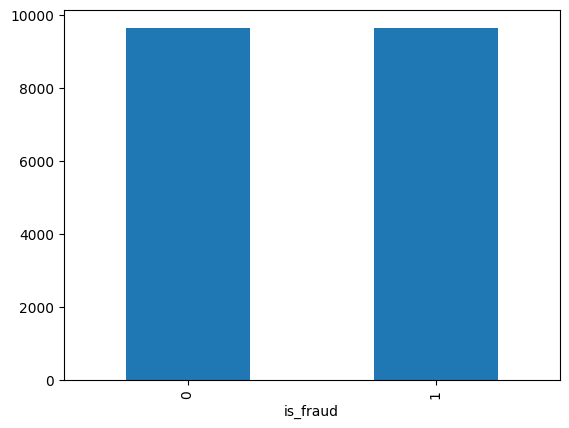

In [9]:
df_new.groupby("is_fraud").count()['cc_num'].plot(kind = "bar")

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 2449 to 135673
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19302 non-null  int64  
 1   trans_date_trans_time  19302 non-null  object 
 2   cc_num                 19302 non-null  int64  
 3   merchant               19302 non-null  object 
 4   category               19302 non-null  object 
 5   amt                    19302 non-null  float64
 6   first                  19302 non-null  object 
 7   last                   19302 non-null  object 
 8   gender                 19302 non-null  object 
 9   street                 19302 non-null  object 
 10  city                   19302 non-null  object 
 11  state                  19302 non-null  object 
 12  zip                    19302 non-null  int64  
 13  lat                    19302 non-null  float64
 14  long                   19302 non-null  float64
 15  cit

In [11]:
useless_cols = [
    'Unnamed: 0',
    'merchant',
    'cc_num',
    'first',
    'zip',
    'last',
    'trans_num',
    'unix_time',
    'street',
    'merch_lat',
    'gender',
    'merch_long',
    'job',
    'trans_date_trans_time'
]

# Dropping the columns
df_new.drop(columns=useless_cols, inplace=True)

In [12]:
df_new.isna().sum().sum()

0

In [13]:
df_new.duplicated().sum()

2

In [14]:
df_new.drop_duplicates()

,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
...,...,...,...,...,...,...,...,...,...
99709,gas_transport,62.58,Johns Island,SC,32.8357,-79.8217,20478,1997-06-04,0
274694,misc_net,273.25,Belfast,NY,42.3200,-78.0943,1766,1962-06-04,0
807093,misc_pos,2.74,Greendale,WI,42.9373,-87.9943,13973,1981-05-06,0
861157,shopping_net,161.28,Westport,KY,38.4921,-85.4524,564,1996-04-10,0


In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 2449 to 135673
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  19302 non-null  object 
 1   amt       19302 non-null  float64
 2   city      19302 non-null  object 
 3   state     19302 non-null  object 
 4   lat       19302 non-null  float64
 5   long      19302 non-null  float64
 6   city_pop  19302 non-null  int64  
 7   dob       19302 non-null  object 
 8   is_fraud  19302 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.5+ MB


## Feature Engineering 🛠️
we will create new features that can help improve the performance of our models.


In [16]:
df_new["dob"] = pd.to_datetime(df_new["dob"])

In [17]:
from datetime import datetime
df_new["dob"] = df_new["dob"].dt.year
df_new['dob'] = datetime.now().year - df_new['dob']
df_new = df_new.rename(columns = {"dob" : "age"})
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,36,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,36,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,64,1
...,...,...,...,...,...,...,...,...,...
99709,gas_transport,62.58,Johns Island,SC,32.8357,-79.8217,20478,27,0
274694,misc_net,273.25,Belfast,NY,42.3200,-78.0943,1766,62,0
807093,misc_pos,2.74,Greendale,WI,42.9373,-87.9943,13973,43,0
861157,shopping_net,161.28,Westport,KY,38.4921,-85.4524,564,28,0


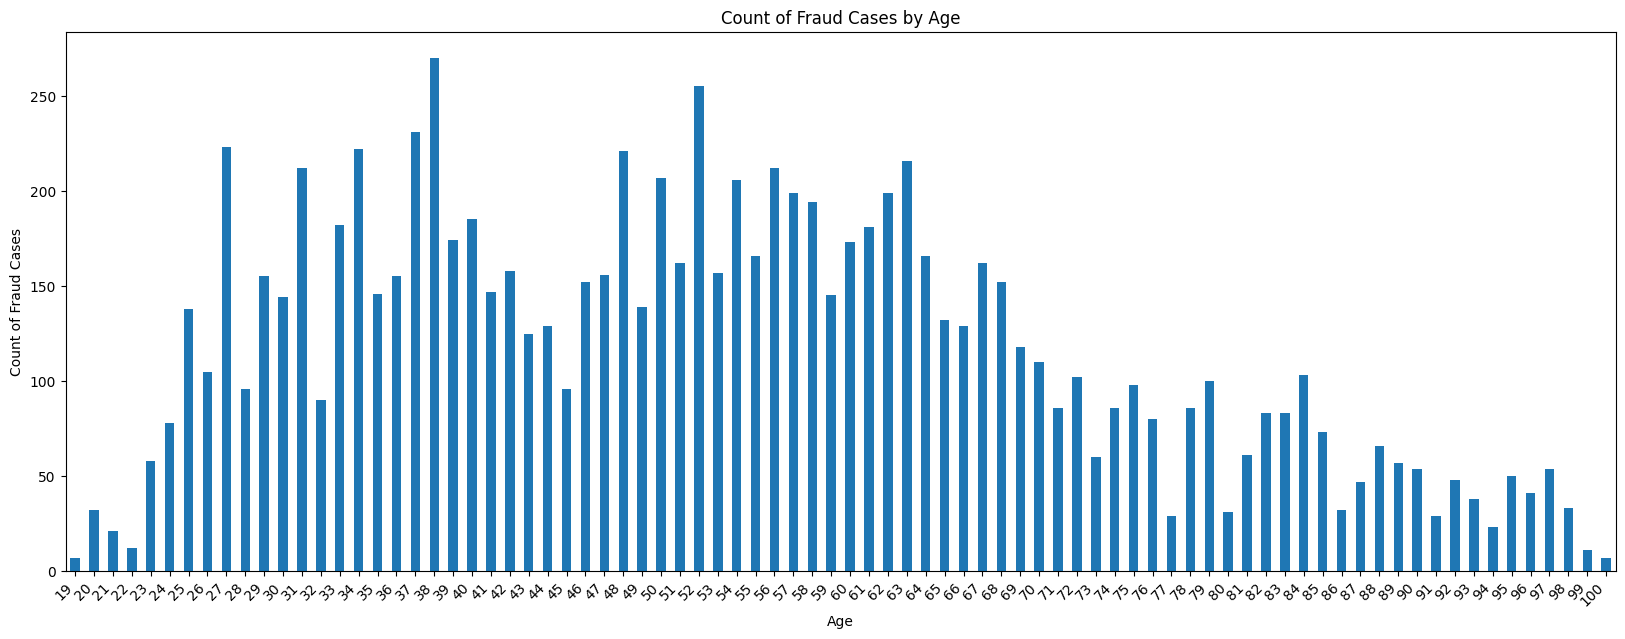

In [18]:
plt.figure(figsize=(20, 7))
ax = df_new[df_new['is_fraud'] == 1].groupby('age').count()['is_fraud'].plot(kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('Count of Fraud Cases')
ax.set_title('Count of Fraud Cases by Age')
plt.xticks(rotation=45, ha='right')
plt.show()


In [19]:
numeric_columns = [i for i in df_new.columns if df_new[i].dtype == 'int64' or df_new[i].dtype =='int32' or df_new[i].dtype =='float64']
categorical_columns = [i for i in df_new.columns if df_new[i].dtype == 'object']

In [20]:
print(numeric_columns)
print(categorical_columns)

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']
['category', 'city', 'state']


In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
for col in categorical_columns:
    df_new[col] = encoder.fit_transform(df_new[col])
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,4,281.06,165,27,35.9946,-81.7266,885,36,1
2472,2,11.52,733,43,29.4400,-98.4590,1595797,64,1
2523,4,276.31,733,43,29.4400,-98.4590,1595797,64,1
2546,2,7.03,165,27,35.9946,-81.7266,885,36,1
2553,4,275.73,733,43,29.4400,-98.4590,1595797,64,1
...,...,...,...,...,...,...,...,...,...
99709,2,62.58,392,40,32.8357,-79.8217,20478,27,0
274694,8,273.25,61,34,42.3200,-78.0943,1766,62,0
807093,9,2.74,305,48,42.9373,-87.9943,13973,43,0
861157,11,161.28,880,17,38.4921,-85.4524,564,28,0


In [22]:
columns = df_new.columns.tolist() 
columns.remove('is_fraud')
X = df_new.drop(['is_fraud'], axis=1)
y = df_new['is_fraud']

scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])
df_new[X.columns] = X
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,-0.709574,-0.048824,-1.077481,0.034310,-0.510595,0.611576,-0.291727,-0.891598,1
2472,-1.225613,-0.766329,1.084657,1.152756,-1.789179,-0.575843,4.991972,0.660956,1
2523,-0.709574,-0.061468,1.084657,1.152756,-1.789179,-0.575843,4.991972,0.660956,1
2546,-1.225613,-0.778281,-1.077481,0.034310,-0.510595,0.611576,-0.291727,-0.891598,1
2553,-0.709574,-0.063012,1.084657,1.152756,-1.789179,-0.575843,4.991972,0.660956,1
...,...,...,...,...,...,...,...,...,...
99709,-1.225613,-0.630409,-0.213387,0.943047,-1.126791,0.746758,-0.226818,-1.390633,0
274694,0.322505,-0.069614,-1.473365,0.523630,0.723280,0.869343,-0.288808,0.550060,0
807093,0.580524,-0.789701,-0.544559,1.502270,0.843695,0.166787,-0.248368,-0.503459,0
861157,1.096564,-0.367673,1.644225,-0.664718,-0.023416,0.347174,-0.292790,-1.335184,0


## Building the Models 🏗️

We will build several machine learning models to detect fraudulent transactions. 
This includes logistic regression, decision trees, random forests, gradient boosting, XGBoost, SVC, KNeighborsClassifier, and GaussianNB.

**Models to Build:**
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting Machine (GBM)
5. XGBoost
6. Support Vector Classifier (SVC)
7. K-Nearest Neighbors (KNeighborsClassifier)
8. Gaussian Naive Bayes (GaussianNB)

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}

In [29]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [30]:
# Evaluate each model
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
# Create a DataFrame to display the results
results_df = pd.DataFrame(results).T
results_df

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:16:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.854183,0.939511,0.756869,0.838358
Decision Tree,0.952085,0.954167,0.949715,0.951936
Random Forest,0.954416,0.964987,0.942976,0.953854
Gradient Boosting,0.946905,0.951309,0.941939,0.946601
XGBoost,0.960114,0.953037,0.967859,0.960391
SVC,0.864284,0.969900,0.751685,0.846963
KNN,0.840974,0.885630,0.782789,0.831040
Naive Bayes,0.800570,0.963971,0.624158,0.757709
AdaBoost,0.915048,0.926933,0.900985,0.913775


In [31]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# Train the model on the training data
xgb_model.fit(X_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:16:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Evaluating the Models 📈

We will evaluate the performance of our models using various metrics such as accuracy, precision, recall, 
and the F1 score. We will also plot the ROC curves and calculate the AUC.

**Evaluation Metrics:**
1. Accuracy
2. Precision
3. Recall
4. F1 Score

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
# Print confusion matrix and classification report
y_pred = xgb_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1840   92]
 [  62 1867]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1932
           1       0.95      0.97      0.96      1929

    accuracy                           0.96      3861
   macro avg       0.96      0.96      0.96      3861
weighted avg       0.96      0.96      0.96      3861



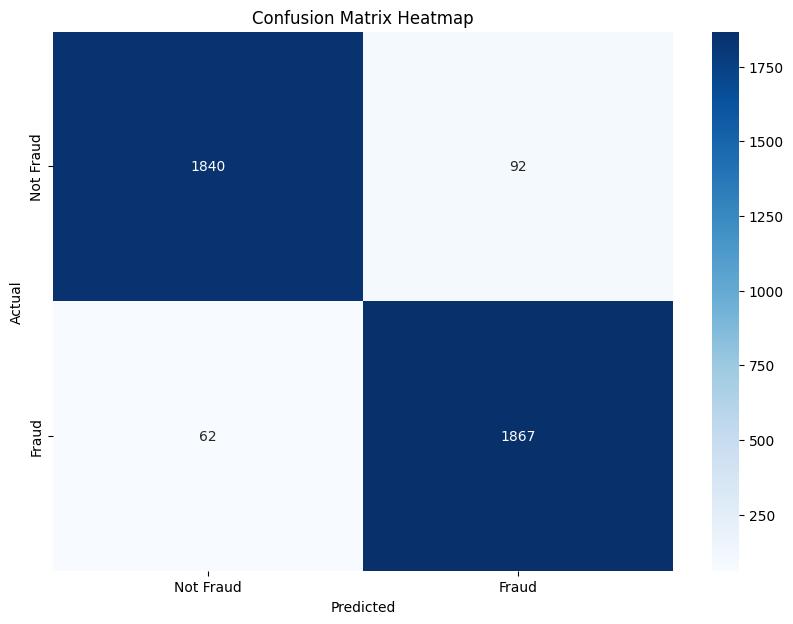

In [33]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [34]:
# Save the model to a file
import joblib
joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']